<a href="https://colab.research.google.com/github/starvar7169/leadbasic/blob/main/ctcanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
data=pd.read_csv("coinmarketcap_06012018.csv")
market_cap = data[["id","market_cap_usd"]]
print(market_cap.head())

             id  market_cap_usd
0       bitcoin    284909052105
1        ripple    119207709132
2      ethereum    100115499075
3  bitcoin-cash     44424061657
4       cardano     25916647856


In [3]:
market_cap.count()

id                100
market_cap_usd    100
dtype: int64

In [4]:
print(market_cap.dropna(subset=['market_cap_usd']))
print(market_cap.count())

                      id  market_cap_usd
0                bitcoin    284909052105
1                 ripple    119207709132
2               ethereum    100115499075
3           bitcoin-cash     44424061657
4                cardano     25916647856
..                   ...             ...
95            quantstamp       329103148
96  raiden-network-token       317135853
97           gamecredits       314180254
98            enjin-coin       308707284
99                bancor       299515469

[100 rows x 2 columns]
id                100
market_cap_usd    100
dtype: int64


             id  market_cap_usd
0       bitcoin    284909052105
1        ripple    119207709132
2      ethereum    100115499075
3  bitcoin-cash     44424061657
4       cardano     25916647856
5      litecoin     16574020942
6           nem     14813369998
7       stellar     12634630726
8          tron     11741640953
9          iota     11143859582


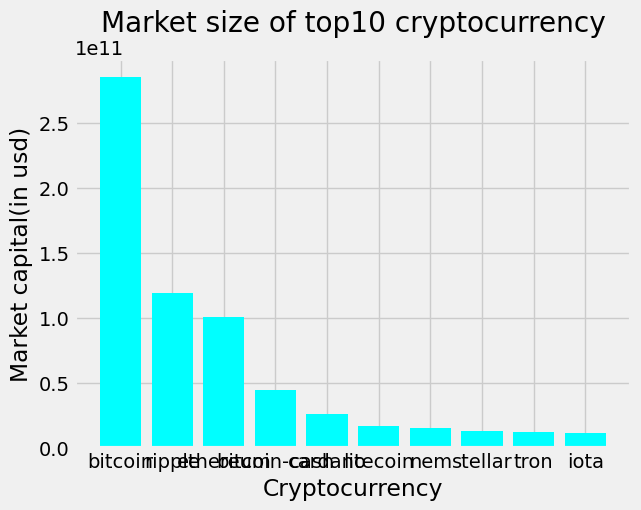

In [5]:
cap_10= market_cap.nlargest(10, 'market_cap_usd')
print(cap_10)
plt.bar(cap_10['id'], cap_10['market_cap_usd'], color='cyan')
plt.title('Market size of top10 cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Market capital(in usd)')
plt.show()

             id  market_cap_usd  market_cap_perc
0       bitcoin    284909052105        37.447419
1        ripple    119207709132        15.668232
2      ethereum    100115499075        13.158820
3  bitcoin-cash     44424061657         5.838939
4       cardano     25916647856         3.406391
5      litecoin     16574020942         2.178430
6           nem     14813369998         1.947016
7       stellar     12634630726         1.660650
8          tron     11741640953         1.543279
9          iota     11143859582         1.464709


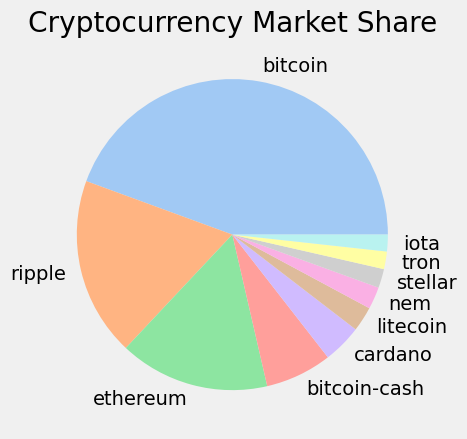

In [6]:
cap_10 = cap_10.assign(market_cap_perc= lambda x: x['market_cap_usd']/market_cap['market_cap_usd'].sum()*100)
print(cap_10)
colors= sns.color_palette('pastel')
plt.pie(cap_10['market_cap_perc'], labels=cap_10['id'], colors=colors)
plt.title("Cryptocurrency Market Share")
plt.show()

volatility in market

In [7]:
volatility=data[['id', 'percent_change_24h','percent_change_7d']]
print(volatility.info())
volatility=volatility.set_index('id')
volatility=volatility.sort_values(by=['percent_change_24h','percent_change_7d'])
print(volatility.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  100 non-null    object 
 1   percent_change_24h  100 non-null    float64
 2   percent_change_7d   100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB
None
          percent_change_24h  percent_change_7d
id                                             
ardor                 -20.83               2.76
tenx                  -15.81               6.55
tron                  -12.63             434.36
digixdao              -12.19              15.65
status                -11.95             201.88


gainer/loser in a day

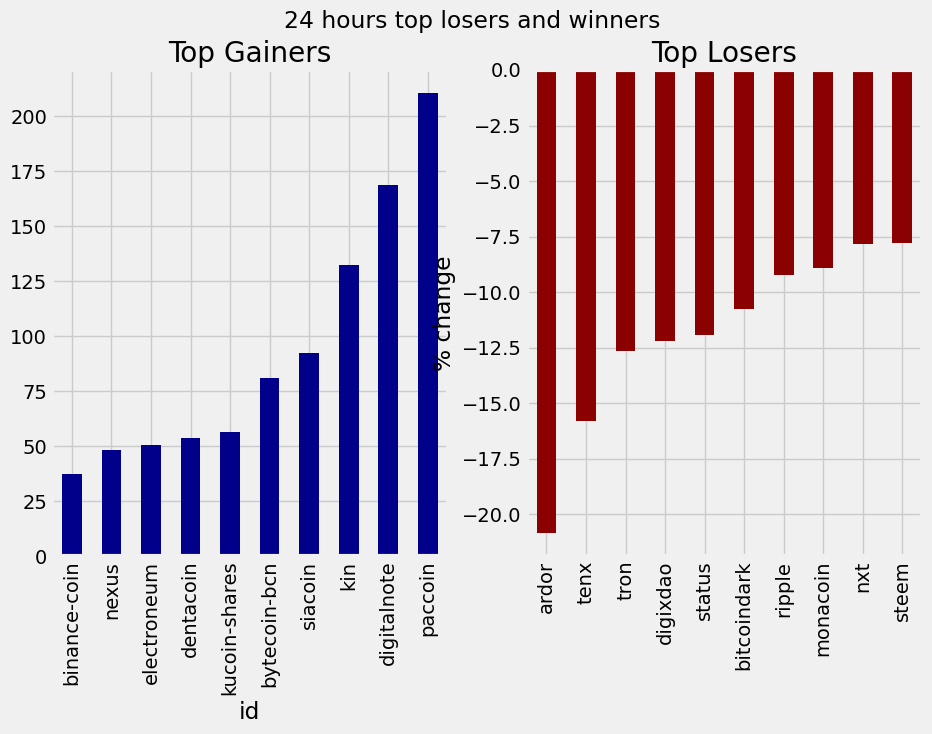

In [10]:
volatility_series = volatility['percent_change_24h'].sort_values()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[1], title="Top Losers")
DTITLE = "24 hours top losers and winners"
fig.suptitle(DTITLE)
ax.set_ylabel('% change')
ax.set_xlabel('')
ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[0], title="Top Gainers")
plt.show()

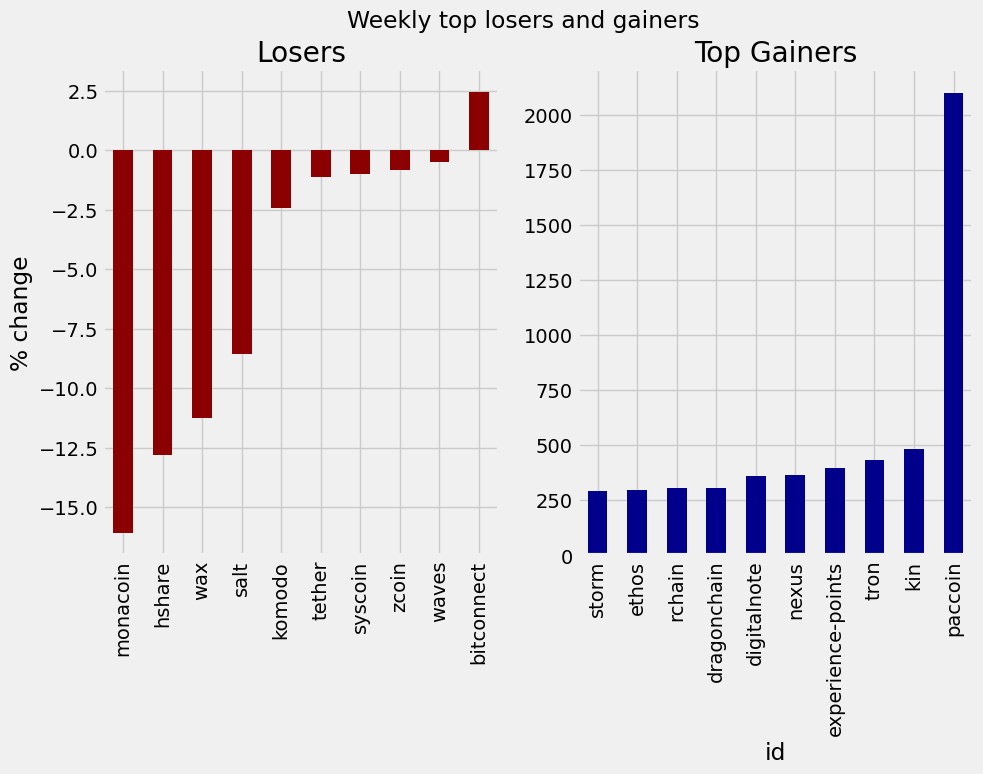

In [14]:
volitality_weekly= volatility['percent_change_7d'].sort_values()
DTITLE= 'Weekly top losers and gainers'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.suptitle(DTITLE)
ax = volitality_weekly[:10].plot.bar(color="darkred", ax=axes[0], title="Top Losers")
ax.set_ylabel('% change')
ax.set_xlabel('')
ax = volitality_weekly[-10:].plot.bar(color="darkblue", ax=axes[1], title="Top Gainers")
plt.show()

In [17]:
largecap= market_cap.query('market_cap_usd > 1e+10')
print(largecap)
print(largecap.count())

             id  market_cap_usd
0       bitcoin    284909052105
1        ripple    119207709132
2      ethereum    100115499075
3  bitcoin-cash     44424061657
4       cardano     25916647856
5      litecoin     16574020942
6           nem     14813369998
7       stellar     12634630726
8          tron     11741640953
9          iota     11143859582
id                10
market_cap_usd    10
dtype: int64


             id  market_cap_usd
0       bitcoin    284909052105
1        ripple    119207709132
2      ethereum    100115499075
3  bitcoin-cash     44424061657
4       cardano     25916647856
5      litecoin     16574020942
6           nem     14813369998
7       stellar     12634630726
8          tron     11741640953
9          iota     11143859582


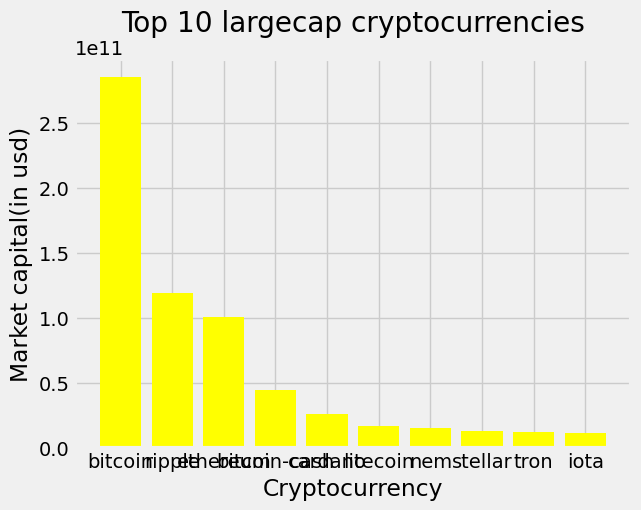

In [28]:
largecap=largecap.sort_values(by='market_cap_usd', ascending= False)
print(largecap)
plt.bar(largecap['id'], largecap['market_cap_usd'], color= 'yellow')
plt.title('Top 10 largecap cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Market capital(in usd)')
plt.show()

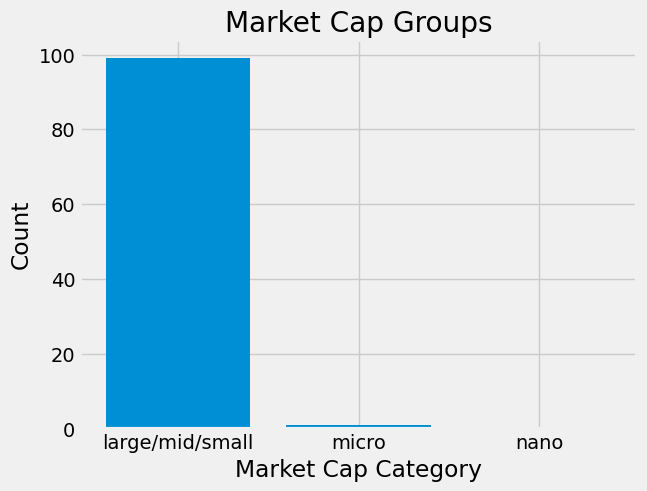

In [32]:
LABELS = ['large/mid/small', 'micro', 'nano']

large_mid_small_count = market_cap.query('market_cap_usd > 3E+8').shape[0]

micro_count = market_cap.query('market_cap_usd >= 5E+7 & market_cap_usd < 3E+8').shape[0]

nano_count = market_cap.query('market_cap_usd < 5E+7').shape[0]
values = [large_mid_small_count, micro_count, nano_count]

# Plotting the market cap counts with matplotlib
plt.bar(range(len(values)), values, tick_label=LABELS)
plt.title("Market Cap Groups")
plt.ylabel("Count")
plt.xlabel("Market Cap Category")
plt.show()